In [425]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [426]:
sales_gdf = pd.read_csv('data/sales_gdf.csv')

In [427]:
final_df = pd.read_csv('data/Full_Data_long.csv')
final_df.info()
final_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218374 entries, 0 to 218373
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   GEO_ID                    218353 non-null  object 
 1   Year                      218374 non-null  int64  
 2   pin                       218374 non-null  int64  
 3   sale_price                218374 non-null  float64
 4   age                       218374 non-null  int64  
 5   addr                      218371 non-null  object 
 6   hd_sf                     218374 non-null  float64
 7   n_units                   218374 non-null  float64
 8   bldg_sf                   132602 non-null  float64
 9   geometry                  218374 non-null  object 
 10  pri_neigh                 218374 non-null  object 
 11  sec_neigh                 218374 non-null  object 
 12  side                      218374 non-null  object 
 13  actual_sf                 218374 non-null  f

,GEO_ID,Year,pin,sale_price,age,addr,hd_sf,n_units,bldg_sf,geometry,...,Percent White,Percent Black,Percent HH with Children,Percent Housing Vacant,Number of Public Schools,crime_count,crimes_per_capita,station_id,station_name,distance_miles
0,1500000US170318392002,2015,17273100931118,53000.0,44,2921 S MICHIGAN AVE,365398.0,679.0,NaN,POINT (-87.62257654590501 41.8402291575061),...,0.122995,0.699771,0.265432,0.111835,1.0,209.0,0.159664,30382.0,Cermak-McCormick Place,0.213983
1,1500000US170313514001,2018,17343220150000,410000.0,130,3819 S WABASH AVE,3850.0,1.0,5050.0,POINT (-87.62436774377279 41.8249549567756),...,0.034858,0.917211,0.433090,0.062945,1.0,296.0,0.161220,30214.0,35th-Bronzeville-IIT,0.183507
2,1500000US170318420001,2019,17341030641004,250000.0,11,223 E 31ST ST,2738.0,3.0,NaN,POINT (-87.62080085952471 41.8381539098695),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30214.0,35th-Bronzeville-IIT,0.303191


In [429]:
final_df[final_df['pri_neigh'] == 'Loop'][['pri_neigh', 'sale_price', 'addr', 'actual_sf']].sort_values(by='actual_sf')

,pri_neigh,sale_price,addr,actual_sf
178735,Loop,24000.0,235 W VAN BUREN ST,17.332037
180119,Loop,26000.0,235 W VAN BUREN ST,17.332037
180368,Loop,235000.0,235 W VAN BUREN ST,17.332037
179494,Loop,295000.0,235 W VAN BUREN ST,17.332037
180036,Loop,318500.0,235 W VAN BUREN ST,17.332037
...,...,...,...,...
178855,Loop,1200000.0,1142 S MICHIGAN AVE,1068.750000
177823,Loop,1278500.0,1142 S MICHIGAN AVE,1068.750000
180439,Loop,215000.0,533 S PLYMOUTH CT,1921.000000
180830,Loop,1925000.0,192 N PARK DR,18187.222222


In [430]:
final_df['pricer_per_sqft'] = final_df['sale_price'] / final_df['actual_sf']
#final_df['pricer_per_unit'] = final_df['sale_price'] / final_df['n_units']
final_df_avgsale = pd.DataFrame(final_df.groupby('pri_neigh')['pricer_per_sqft'].mean().sort_values(ascending=False)).reset_index()
final_df_avgsale = final_df_avgsale.merge(sales_gdf[['pri_neigh', 'side']].drop_duplicates(), on='pri_neigh', how='left')
final_df_avgsale[final_df_avgsale['side'] == 'Central']

,pri_neigh,pricer_per_sqft,side
0,Streeterville,inf,Central
1,Rush & Division,3952.285508,Central
2,Loop,3817.829633,Central
3,River North,3790.253389,Central
4,Gold Coast,2999.647596,Central
5,Printers Row,1788.759813,Central
8,Near South Side,1314.880008,Central


# Data Visualization

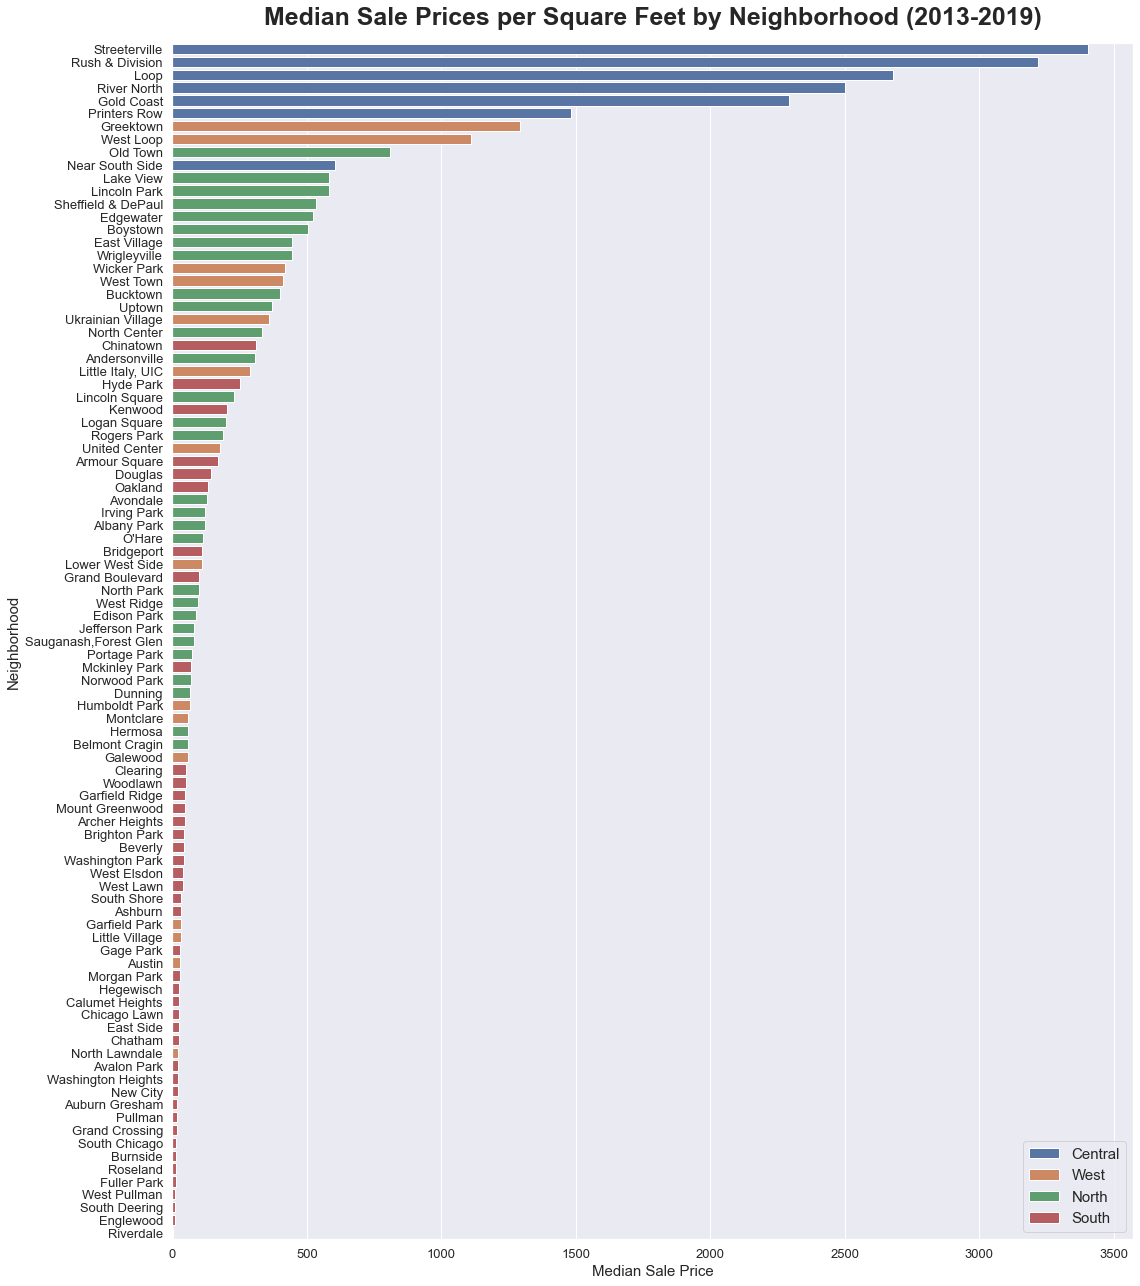

In [543]:
final_df['pricer_per_unit'] = final_df['sale_price'] / (final_df['hd_sf'] / final_df['n_units'])

final_df_avgsale = pd.DataFrame(final_df.groupby('pri_neigh')['pricer_per_unit'].median().sort_values(ascending=False)).reset_index()
final_df_avgsale = final_df_avgsale.merge(sales_gdf[['pri_neigh', 'side']].drop_duplicates(), on='pri_neigh', how='left')

fig, ax = plt.subplots(figsize=(16,18))

sns.barplot(final_df_avgsale.pricer_per_unit, final_df_avgsale.pri_neigh, hue=final_df_avgsale.side, dodge=False)
ax.set_title('Median Sale Prices per Square Feet by Neighborhood (2013-2019)', fontsize=25,
             fontweight="bold", loc='center', y=1.01)
ax.set_xlabel('Median Sale Price', fontsize=15)
ax.set_ylabel('Neighborhood', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(loc='lower right', fontsize=15)

fig.tight_layout()
plt.savefig('figures/saleprice_per_sqft_by_nbh.png')
plt.show()

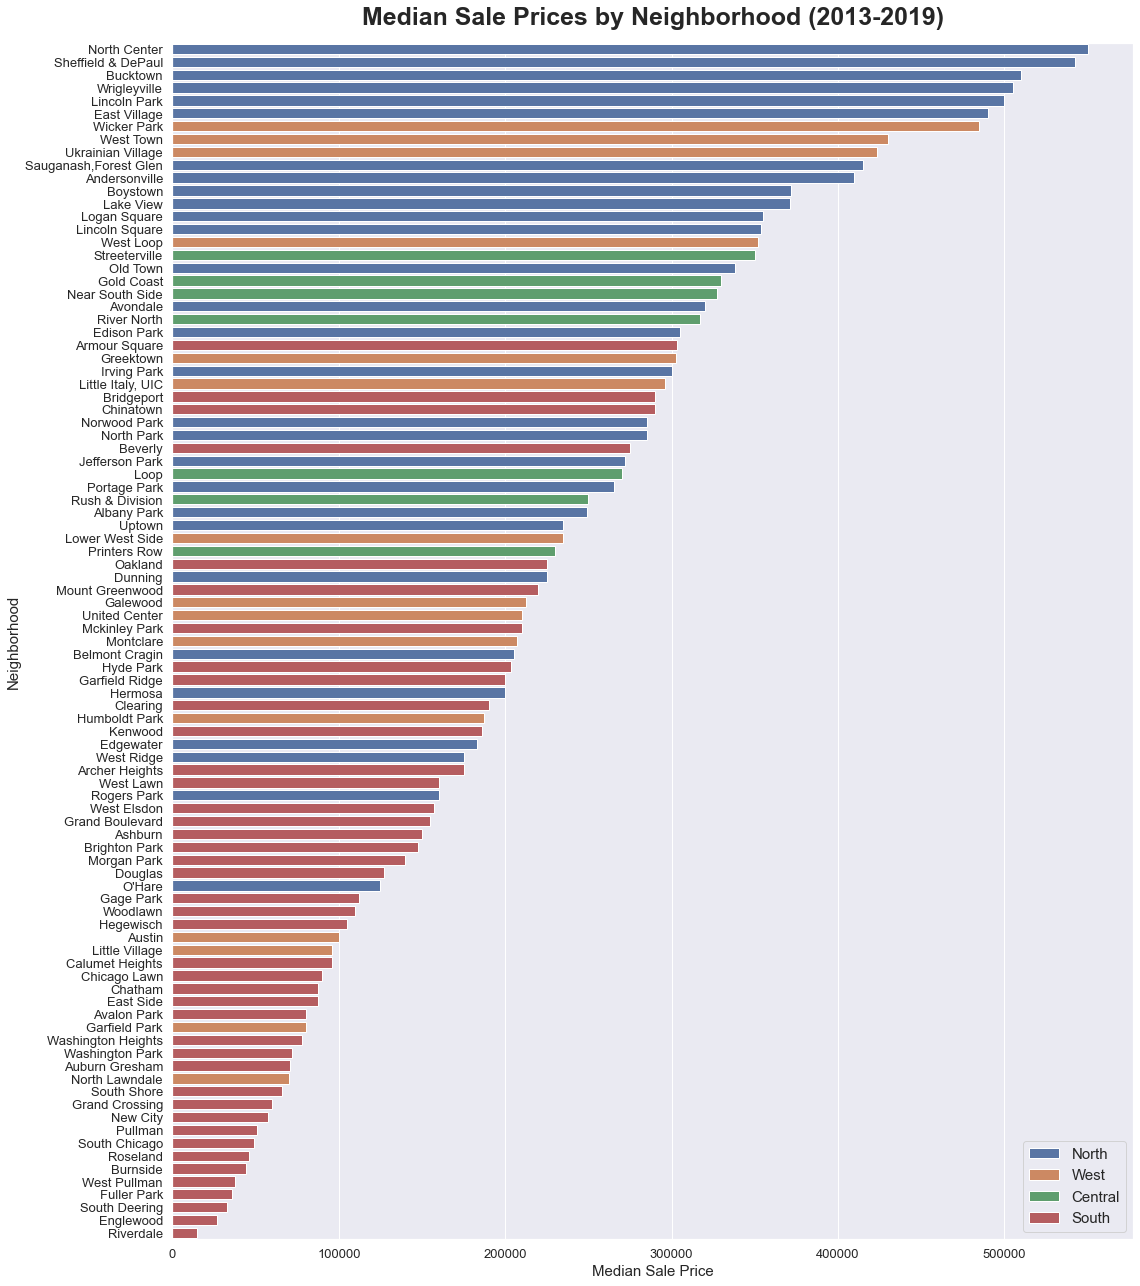

In [544]:
final_df_avgsale = pd.DataFrame(final_df.groupby('pri_neigh')['sale_price'].median().sort_values(ascending=False)).reset_index()
final_df_avgsale = final_df_avgsale.merge(sales_gdf[['pri_neigh', 'side']].drop_duplicates(), on='pri_neigh', how='left')

fig, ax = plt.subplots(figsize=(16,18))

sns.barplot(final_df_avgsale.sale_price, final_df_avgsale.pri_neigh, hue=final_df_avgsale.side, dodge=False)
ax.set_title('Median Sale Prices by Neighborhood (2013-2019)', fontsize=25,
             fontweight="bold", loc='center', y=1.01)
ax.set_xlabel('Median Sale Price', fontsize=15)
ax.set_ylabel('Neighborhood', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(loc='lower right', fontsize=15)

fig.tight_layout()
plt.savefig('figures/median_saleprice_by_nbh.png')
plt.show()

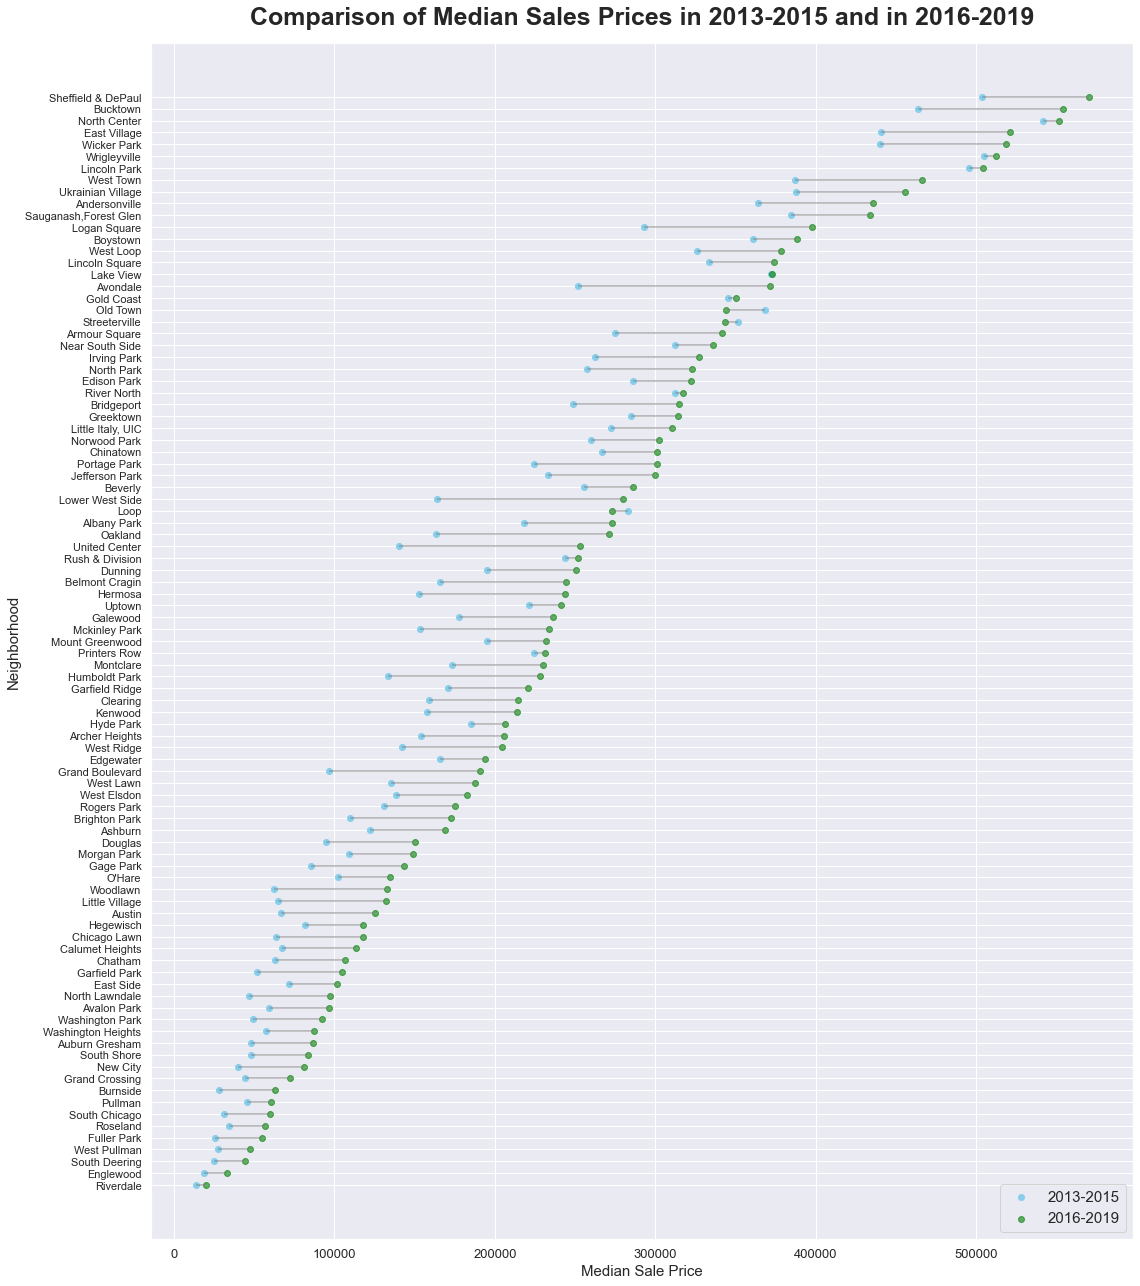

In [545]:
sales_compare = final_df.groupby(['pri_neigh', 'Year'])['sale_price'].median().unstack()
sales_compare['2013-2015'] = sales_compare[[2013, 2014, 2015]].mean(axis=1)
sales_compare['2016-2019'] = sales_compare[[2016, 2017, 2018, 2019]].mean(axis=1)
sales_compare = sales_compare[['2013-2015', '2016-2019']]
sales_compare = sales_compare.sort_values(by='2016-2019', ascending=True)


my_range=range(1,len(sales_compare.index)+1)
 
# The vertical plot is made using the hline function
# I load the seaborn library only to benefit the nice looking feature
fig, ax = plt.subplots(figsize=(16,18))

plt.hlines(y=my_range, xmin=sales_compare['2013-2015'], xmax=sales_compare['2016-2019'], color='grey', alpha=0.6)
plt.scatter(sales_compare['2013-2015'], my_range, color='skyblue', alpha=1, label='2013-2015')
plt.scatter(sales_compare['2016-2019'], my_range, color='green', alpha=0.6 , label='2016-2019')
plt.legend()
 
# Add title and axis names
ax.set_title('Comparison of Median Sales Prices in 2013-2015 and in 2016-2019', fontsize=25,
             fontweight="bold", loc='center', y=1.01)
ax.set_xlabel('Median Sale Price', fontsize=15)
ax.set_ylabel('Neighborhood', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(my_range, sales_compare.index)
plt.legend(loc='lower right', fontsize=15)

fig.tight_layout()
plt.savefig('figures/median_saleprice_avg.png')
plt.show()

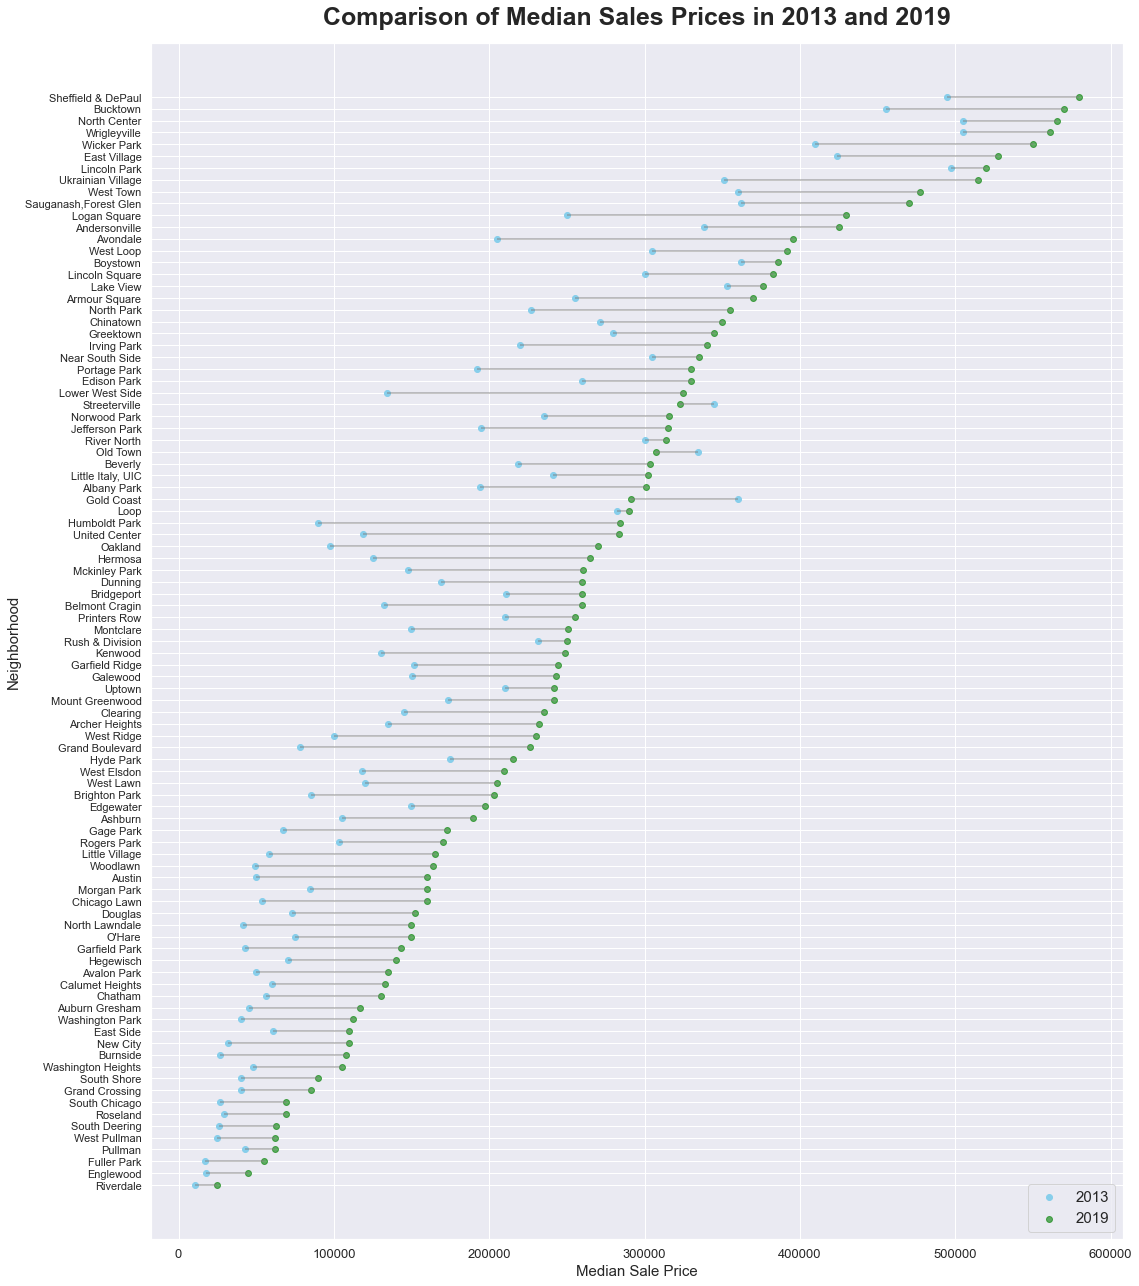

In [546]:
sales_compare = final_df[(final_df['Year'] == 2013) | (final_df['Year'] == 2019)]
sales_compare = sales_compare.groupby(['pri_neigh', 'Year'])['sale_price'].median().unstack()
sales_compare = sales_compare.sort_values(by=2019, ascending=True)
sales_compare['diff'] = sales_compare[2019] - sales_compare[2013]


my_range=range(1,len(sales_compare.index)+1)
 
# The vertical plot is made using the hline function
# I load the seaborn library only to benefit the nice looking feature
fig, ax = plt.subplots(figsize=(16,18))

plt.hlines(y=my_range, xmin=sales_compare[2013], xmax=sales_compare[2019], color='grey', alpha=0.6)
plt.scatter(sales_compare[2013], my_range, color='skyblue', alpha=1, label='2013')
plt.scatter(sales_compare[2019], my_range, color='green', alpha=0.6 , label='2019')
plt.legend()
 
# Add title and axis names
ax.set_title('Comparison of Median Sales Prices in 2013 and 2019', fontsize=25,
             fontweight="bold", loc='center', y=1.01)
ax.set_xlabel('Median Sale Price', fontsize=15)
ax.set_ylabel('Neighborhood', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(my_range, sales_compare.index)
plt.legend(loc='lower right', fontsize=15)

fig.tight_layout()
plt.savefig('figures/median_saleprice.png')
plt.show()

      side      2013      2014      2015      2016      2017      2018
0  Central  3.466284  3.434414  3.441419  3.319768  2.864886  2.858917
1    North  3.889184  4.290038  4.528302  4.528302  4.440913  4.227642
2    South  1.751501  2.087119  2.743069  2.777127  3.061474  3.190351
3     West  3.604115  4.224709  4.939682  4.823778  4.996813  4.964020


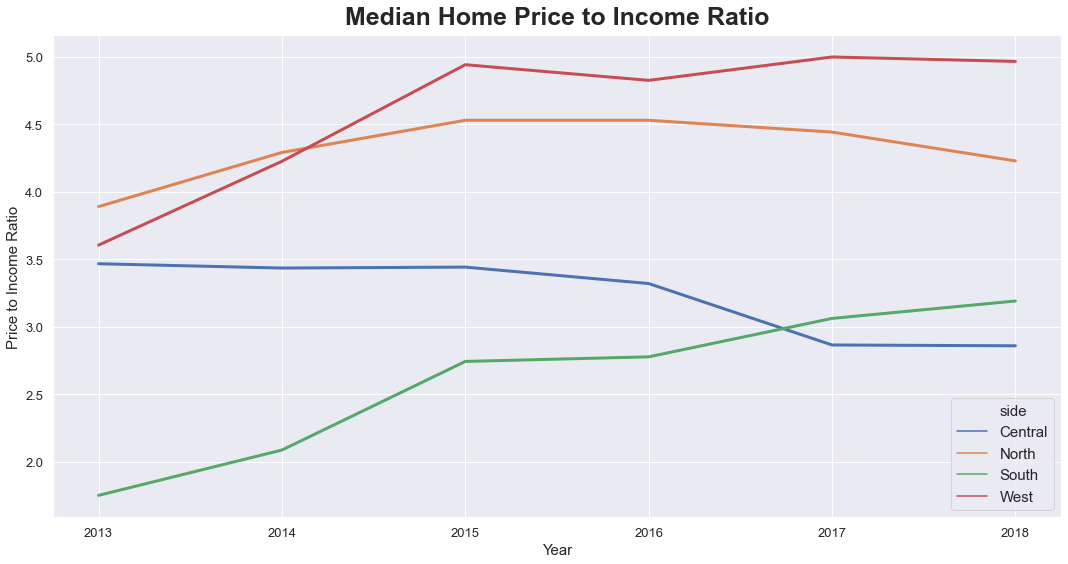

In [565]:
median_income_by_year = final_df.groupby(['side', 'Year'])['Median HH Income'].median().unstack()
median_price_by_year = final_df.groupby(['side', 'Year'])['sale_price'].median().unstack()
median_inc_to_price = pd.DataFrame()
for year in range(2013, 2019):
    median_inc_to_price[year] = median_price_by_year[year] / median_income_by_year[year]
median_inc_to_price = median_inc_to_price.reset_index()
print(median_inc_to_price.head())

median_inc_to_price = median_inc_to_price.melt(id_vars=["side"], var_name="year", value_name="price_to_income_ratio")

sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(15,8))

sns.lineplot(x="year", y="price_to_income_ratio", hue='side', data=median_inc_to_price, lw=3)
ax.set_title('Median Home Price to Income Ratio', fontsize=25,
             fontweight="bold", loc='center', y=1.01)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Price to Income Ratio', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(loc='lower right', fontsize=15)

fig.tight_layout()
plt.savefig('figures/side_price_to_income_ratio.png')
plt.show()

In [581]:
median_income_by_year = final_df.groupby(['pri_neigh', 'Year'])['Median HH Income'].median().unstack()
median_price_by_year = final_df.groupby(['pri_neigh', 'Year'])['sale_price'].median().unstack()
median_inc_to_price = pd.DataFrame()
for year in range(2013, 2019):
    median_inc_to_price[year] = median_price_by_year[year] / median_income_by_year[year]
median_inc_to_price = median_inc_to_price.reset_index()#.sort_values(by=2018, ascending=False)
median_inc_to_price['biggest_diff'] = (median_inc_to_price[2018] - median_inc_to_price[2013]) / median_inc_to_price[2013]
median_inc_to_price = median_inc_to_price.sort_values(by='biggest_diff', ascending=False)
median_inc_to_price = median_inc_to_price[['pri_neigh', 2013, 2014, 2015, 2016, 2017, 2018]]
median_inc_to_price = median_inc_to_price[:7].melt(id_vars=["pri_neigh"], var_name="year", value_name="price_to_income_ratio")
median_inc_to_price

,pri_neigh,year,price_to_income_ratio
0,Oakland,2013,2.066203
1,Fuller Park,2013,0.834356
2,Douglas,2013,1.356222
3,Garfield Park,2013,1.484146
4,New City,2013,0.997755
5,Burnside,2013,0.791470
6,Woodlawn,2013,1.854808
7,Oakland,2014,2.300667
8,Fuller Park,2014,1.534884
9,Douglas,2014,2.812280


        pri_neigh      2013      2014      2015      2016      2017      2018
63        Oakland  2.066203  2.300667  6.392447  4.417966  8.068127  9.681972
28    Fuller Park  0.834356  1.534884  1.017821  1.505665  1.614661  3.456749
21        Douglas  1.356222  2.812280  3.159225  3.600510  2.819977  4.189535
31  Garfield Park  1.484146  1.671034  2.579560  2.885574  3.448540  4.560394
57       New City  0.997755  1.347826  1.629265  2.002470  2.174163  2.903740


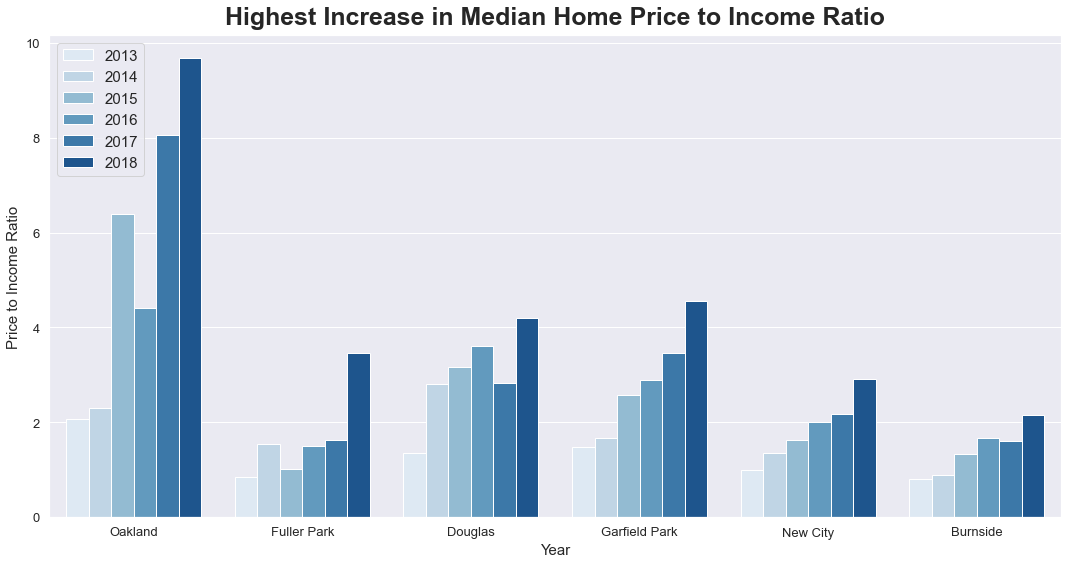

In [598]:
median_income_by_year = final_df.groupby(['pri_neigh', 'Year'])['Median HH Income'].median().unstack()
median_price_by_year = final_df.groupby(['pri_neigh', 'Year'])['sale_price'].median().unstack()
median_inc_to_price = pd.DataFrame()
for year in range(2013, 2019):
    median_inc_to_price[year] = median_price_by_year[year] / median_income_by_year[year]
median_inc_to_price = median_inc_to_price.reset_index()#.sort_values(by=2018, ascending=False)
median_inc_to_price['biggest_diff'] = (median_inc_to_price[2018] - median_inc_to_price[2013]) / median_inc_to_price[2013]
median_inc_to_price = median_inc_to_price.sort_values(by='biggest_diff', ascending=False)
median_inc_to_price = median_inc_to_price[['pri_neigh', 2013, 2014, 2015, 2016, 2017, 2018]]
print(median_inc_to_price.head())

median_inc_to_price = median_inc_to_price[:6].melt(id_vars=["pri_neigh"], var_name="year", value_name="price_to_income_ratio")

sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(15,8))
#sns.palplot(sns.color_palette("Blues"))

sns.barplot(x="pri_neigh", y="price_to_income_ratio", hue="year", data=median_inc_to_price, palette="Blues")
#sns.barplot(x="year", y="price_to_income_ratio", hue="pri_neigh", data=median_inc_to_price)
#sns.lineplot(x="year", y="price_to_income_ratio", hue='pri_neigh', data=median_inc_to_price, lw=3)
ax.set_title('Highest Increase in Median Home Price to Income Ratio', fontsize=25,
             fontweight="bold", loc='center', y=1.01)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Price to Income Ratio', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(loc='upper left', fontsize=15)

fig.tight_layout()
plt.savefig('figures/neighborhood_price_to_income_ratio.png')
plt.show()

       pri_neigh   side     sale_price  Percent White  count
44     Lake View  North  459519.032341       0.865107  12894
45  Lincoln Park  North  675940.452579       0.875253   6530
81        Uptown  North  277206.696816       0.691314   5340
65  Portage Park  North  278149.054411       0.699627   5146
25     Edgewater  North  241783.897711       0.701139   5025


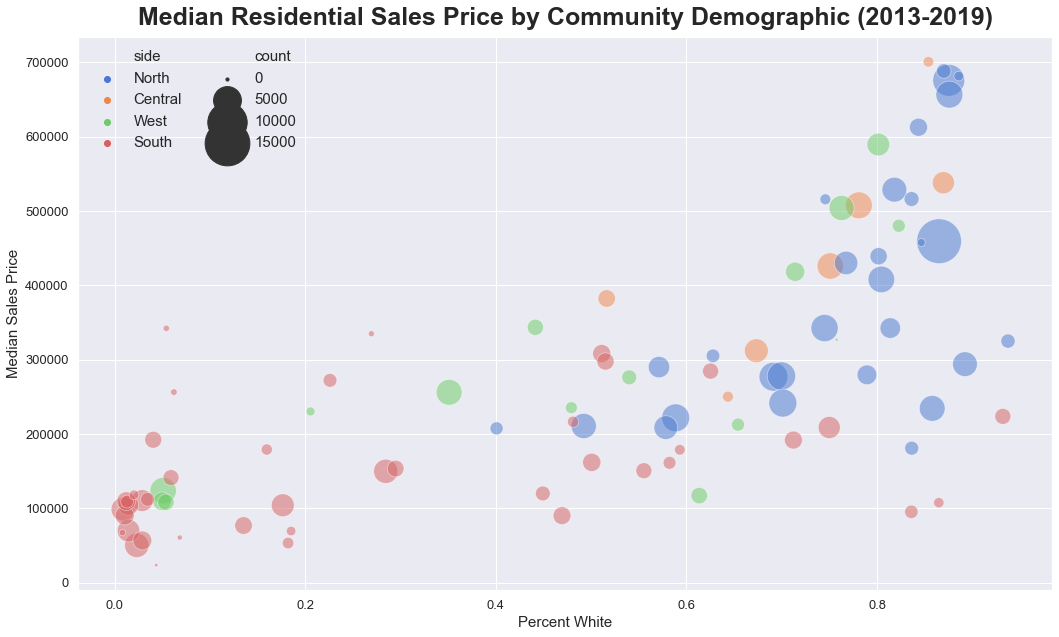

In [556]:
sale_pop = final_df.groupby(['pri_neigh', 'side']).agg({'sale_price':'mean', 'Percent White':'mean', 'pin':'count'})
sale_pop = sale_pop.reset_index().rename(columns={"pin": "count"})
sale_pop = sale_pop.sort_values(by='count', ascending=False)
print(sale_pop.head())

#sns.set(style="white")
fig, ax = plt.subplots(figsize=(15,9))

sns.scatterplot(x="Percent White", y="sale_price", hue="side", size="count",
                sizes=(10, 2000), alpha=.5, palette="muted", data=sale_pop)
ax.set_title('Median Residential Sales Price by Community Demographic (2013-2019)', fontsize=25,
             fontweight="bold", loc='center', y=1.01)
ax.set_xlabel('Percent White', fontsize=15)
ax.set_ylabel('Median Sales Price', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(loc='upper left', fontsize=15, ncol=2, frameon=False)

fig.tight_layout()
plt.savefig('figures/demographic_scatter.png')
plt.show()

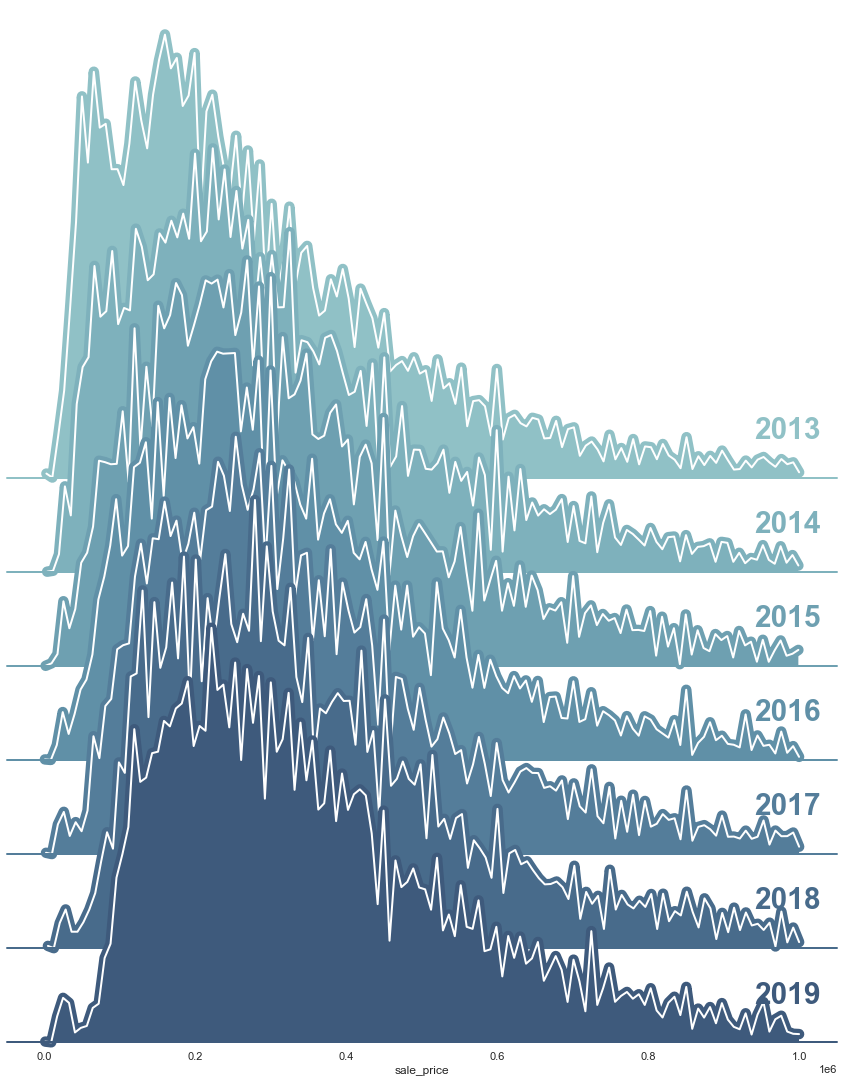

In [551]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="Year", hue="Year", aspect=5.5, height=2.2, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "sale_price", clip_on=False, shade=True, alpha=1, lw=10.5, bw=2)
g.map(sns.kdeplot, "sale_price", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0.9, .1, label, fontweight="bold", color=color, fontsize=30,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "sale_price")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.8)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

plt.savefig('figures/overlap_density.png')
plt.show()

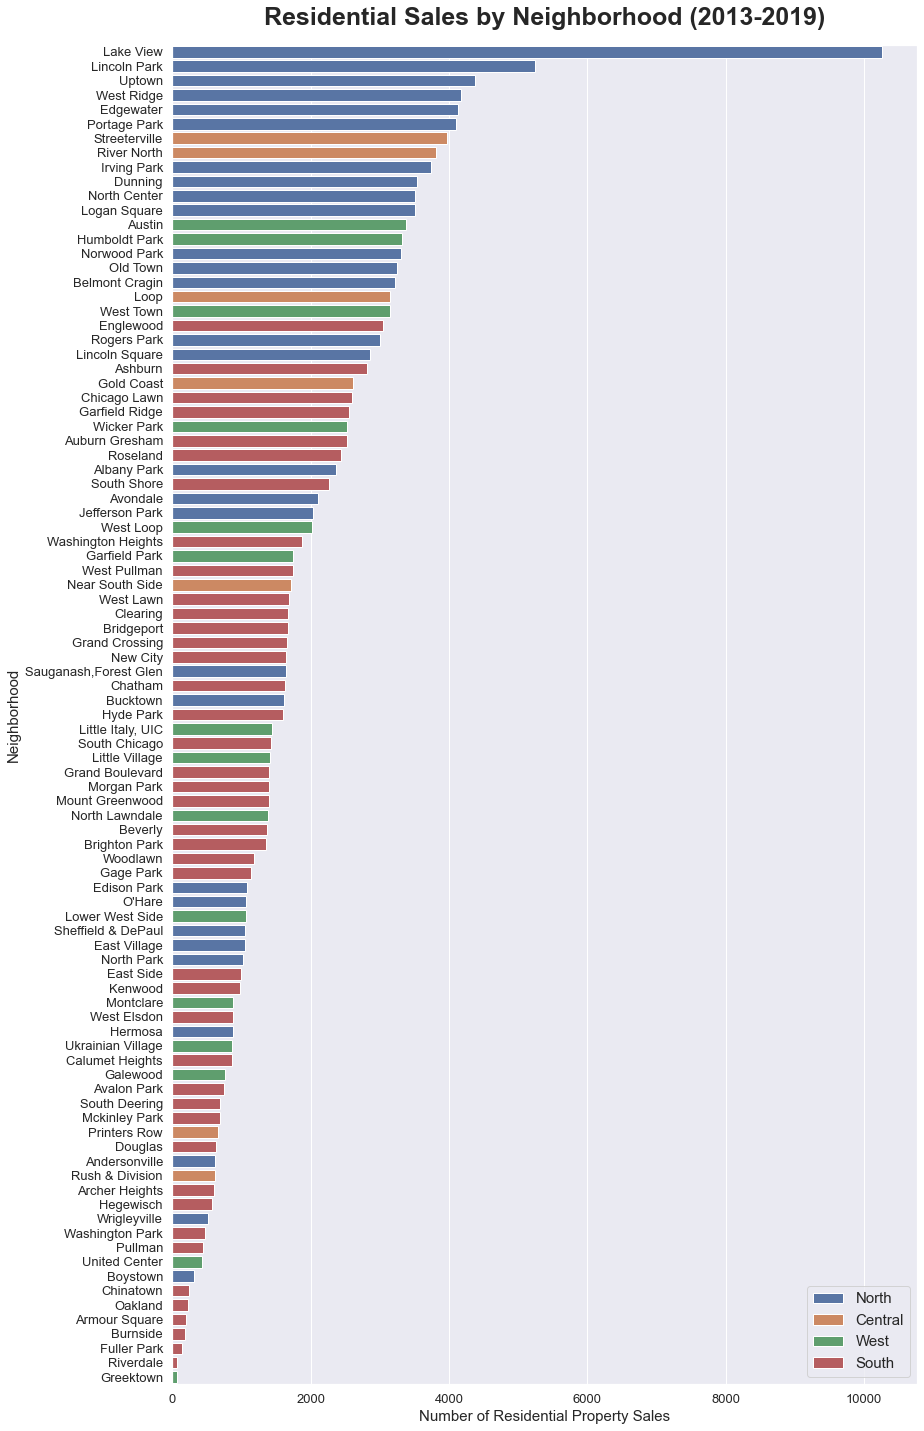

In [554]:
sales_gdf_count = pd.DataFrame(sales_gdf.groupby('pri_neigh')['pin'].nunique().sort_values(ascending=False)).reset_index()
sales_gdf_count = sales_gdf_count.merge(sales_gdf[['pri_neigh', 'side']].drop_duplicates(), on='pri_neigh', how='left')

sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(13,20))

sns.barplot(sales_gdf_count.pin, sales_gdf_count.pri_neigh, hue=sales_gdf_count.side, dodge=False)
ax.set_title('Residential Sales by Neighborhood (2013-2019)', fontsize=25,
             fontweight="bold", loc='center', y=1.01)
ax.set_xlabel('Number of Residential Property Sales', fontsize=15)
ax.set_ylabel('Neighborhood', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(loc='lower right', fontsize=15)

fig.tight_layout()
plt.savefig('figures/num_sales.png')
plt.show()

In [150]:
# income_compare = sales_gdf[['pri_neigh', '2013 Median Income', '2018 Median Income']]
# income_compare = income_compare.groupby('pri_neigh')[['2013 Median Income', '2018 Median Income']].mean()
# income_compare = income_compare.sort_values(by='2018 Median Income', ascending=True)

# my_range=range(1,len(income_compare.index)+1)
 
# # The vertical plot is made using the hline function
# fig, ax = plt.subplots(figsize=(13,20))

# plt.hlines(y=my_range, xmin=income_compare['2013 Median Income'], xmax=income_compare['2018 Median Income'], color='grey', alpha=0.6)
# plt.scatter(income_compare['2013 Median Income'], my_range, color='skyblue', alpha=1, label='2013')
# plt.scatter(income_compare['2018 Median Income'], my_range, color='green', alpha=0.6 , label='2019')
# plt.legend()
 
# # Add title and axis names
# ax.set_title('Comparison of Median Income in 2013 and 2018', fontsize=25,
#              fontweight="bold", loc='center', y=1.01)
# ax.set_xlabel('Median Income', fontsize=15)
# ax.set_ylabel('Neighborhood', fontsize=15)
# plt.xticks(fontsize=13)
# plt.yticks(my_range, income_compare.index)
# plt.legend(loc='lower right', fontsize=15)

# plt.show()